In [48]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [49]:
#########################################
# part (a)
#########################################

def sample(n=1000000,theta=np.array([[3],[1],[2]]),x1_par=(3,2),x2_par=(-1,2),sigma=np.sqrt(2)):
    X = np.column_stack([
            np.full(n,1),
            norm.rvs(loc=x1_par[0],scale=x1_par[1],size=n),
            norm.rvs(loc=x2_par[0],scale=x2_par[1],size=n)
        ])
    eps = norm.rvs(loc=0,scale=sigma,size=(n,1))
    
    return (X,X@theta + eps)

In [105]:
#########################################
# part (b)
#########################################

def normalize(a):
    return (a-a.mean())/a.std()

def h(X, theta):
    return X@theta

def J(X, Y, theta):
    return ((Y-X@theta)**2).mean()/2

def grad_J(X, Y, theta):
    return X.T@(X@theta - Y)/len(Y)

def stochastic_gradient_descent(X, Y, theta, batch_size=100, eta=0.01, stop_lim=0.0001, t_lim=100):
    
    theta_pts = [theta]
    
    train_X = X
    train_Y = Y
    
    t = 0
    
    # Convergence: 
    
    while t < t_lim:
                
        for i in range(len(Y)//batch_size):
            X_batch = train_X[i*batch_size:(i+1)*batch_size]
            Y_batch = train_Y[i*batch_size:(i+1)*batch_size]
        
            loss_grad = grad_J(X_batch,Y_batch,theta_pts[-1])
            theta_n = theta_pts[-1] - eta*loss_grad
        
            if (abs(theta_n - theta_pts[-1]).max() < stop_lim):
                theta_pts.append(theta_n)
                return theta_pts

            theta_pts.append(theta_n)

        p = np.random.permutation(len(train_Y))
        train_X = train_X[p]
        train_Y = train_Y[p]
        
        t += 1
        
    if (t == t_lim):
        print("t_lim hit")
            
    return theta_pts

In [106]:
#########################################
# part (d)
#########################################

def plot_paths(paths, elev=45, azim=60, save_file_name=None):
    
    fig = plt.figure(figsize=(5,5), dpi=150)
    ax = fig.add_axes([0,0,1,1], projection='3d')
    ax.view_init(elev=elev, azim=azim)
    #surf = ax.plot_surface(t0_space, t1_space, loss_space, cmap='viridis', edgecolor=None, alpha=alpha)
    #surf.set_facecolor((0,0,0,0))
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    ax.set_zlabel('theta_2')
    
    for path in paths:
        path = path[::20]
        desc_x, desc_y, desc_z = np.stack(path,axis=0).reshape((len(path),3)).T
        ax.plot(desc_x, desc_y, desc_z, marker='.', alpha=0.5)

In [107]:
# [StopConvert]

In [115]:
X, Y = sample()

In [116]:
from timeit import default_timer as timer

paths = []
for i in [1,100,10000,1000000]:
    
    start_time = timer()
    path = stochastic_gradient_descent(X, Y, np.array([[0],[0],[0]]), batch_size=i)
    end_time = timer()
    paths.append(path)
    print(f"b={i} converged in {len(path)-1} iterations and {end_time-start_time} s")

thetas = np.stack([path[-1] for path in paths])

b=1 converged in 517 iterations and 0.02083385200057819 s
b=100 converged in 10539 iterations and 0.32993187499960186 s
b=10000 converged in 1623 iterations and 2.049439833001088 s
t_lim hit
b=1000000 converged in 100 iterations and 12.240774464000424 s


In [117]:
print(thetas)

[[[2.24348433]
  [1.33820081]
  [1.93986346]]

 [[2.99583409]
  [0.99152495]
  [1.99197696]]

 [[2.96584359]
  [1.0062163 ]
  [1.99618618]]

 [[0.88093968]
  [1.45085508]
  [1.80890148]]]


In [118]:
test_data = pd.read_csv('../data/q2/X.csv')
X = np.column_stack([np.full(len(test_data),1),test_data['X_1'].to_numpy(),test_data['X_2'].to_numpy()])
Y = test_data['Y'].to_numpy().reshape(-1,1)

vector_J = np.vectorize(J,signature="(m,3),(m,1),(3,1)->()")
err = vector_J(X,Y,thetas)
err_def = J(X,Y,np.array([[3],[1],[2]]))

In [119]:
err,err_def

(array([ 6.93164294,  0.99142203,  0.98622999, 13.99642704]), 0.9829469215)

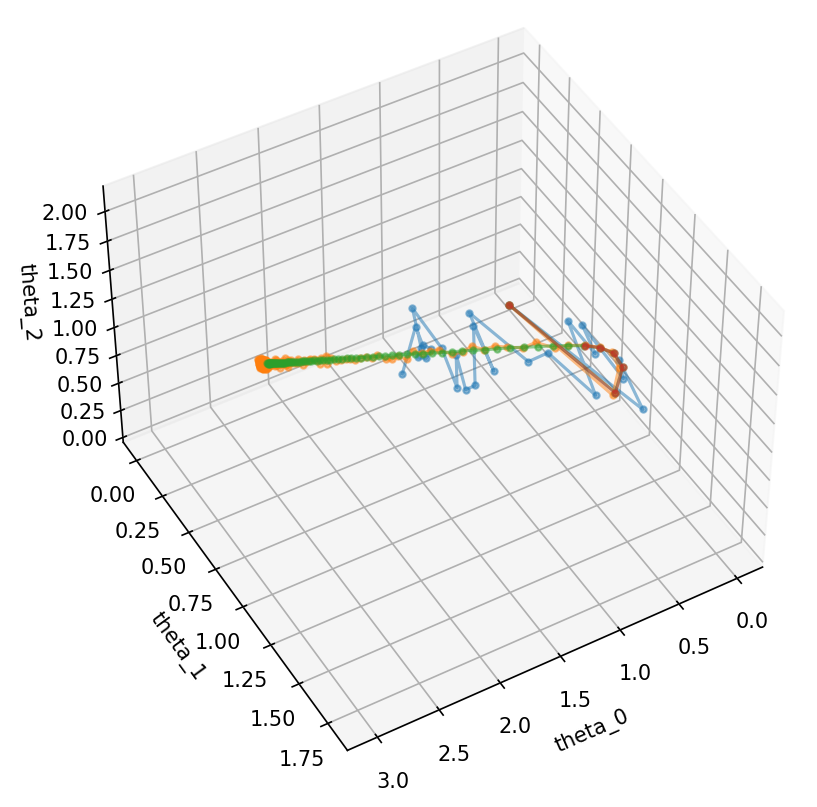

In [120]:
plot_paths(paths)